# OMG Narwhals L3 data processing
## Create NetCDFs for each mooring

#### This notebook merges L2 temperature logger and CTD data to make daily-averaged L3 datasets for each mooring

In [1]:
## allows proper loading of external py scripts and functions
%load_ext autoreload
%autoreload 1

In [2]:
## import all necessary libraries
import string
import numpy as np
import pandas as pd
import csv
import glob, os
import matplotlib.pyplot as plt
from pathlib import Path
from pprint import pprint
import xarray as xr
import netCDF4 as nc4
from statistics import mode
import seaborn as sns

## external, custom py script within same directory
import omgL3_funs

## Create merged L3 datasets for each mooring

In [3]:
years = [2019, 2020]
moorings_2019 = ["Rink glacier", "Kong Oscar glacier", "Sverdrup glacier"]
moorings_2020 = ["Rink glacier", "Kong Oscar glacier"]

processing 2018-2019 Rink/Fisher mooring data
merging Rink datasets


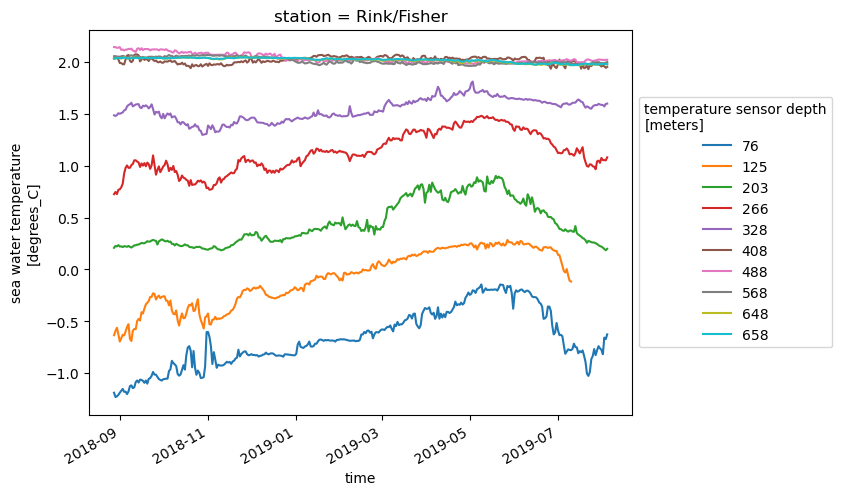

<xarray.Dataset>
Dimensions:                    (station: 1, time: 342, depth_temperature: 10,
                                depth_CTD: 2)
Coordinates:
  * station                    (station) object 'Rink/Fisher'
  * time                       (time) datetime64[ns] 2018-08-28 ... 2019-08-04
  * depth_temperature          (depth_temperature) int32 76 125 203 ... 648 658
  * depth_CTD                  (depth_CTD) int32 76 328
    serial_number_temperature  (depth_temperature) object 'SBE37_03716788' .....
    serial_number_CTD          (depth_CTD) object 'SBE37_03716788' 'SBE37_037...
Data variables:
    latitude                   (station) float64 ...
    longitude                  (station) float64 ...
    temperature                (time, depth_temperature) float64 -1.189 ... 1.98
    salinity                   (time, depth_CTD) float64 33.3 34.15 ... 34.24
    conductivity               (time, depth_CTD) float64 2.682 2.981 ... 2.998
    potential_temperature      (time, depth_CTD) float64 -1.191 1.47 ... 1.582
    pressure                   (time, depth_CTD) float64 76.85 331.3 ... 331.6
    depth                      (time, depth_CTD) float64 76.04 327.6 ... 327.9
    density                    (time, depth_CTD) float64 1.027e+03 ... 1.029e+03
Attributes: (12/53)
    title:                         OMG Narwhals Rink 2018-2019 Ocean Mooring ...
    summary:                       This file contains daily-averaged conducti...
    keywords:                      Conductivity, Salinity, Water Depth, Water...
    keywords_vocabulary:           NASA Global Change Master Directory (GCMD)...
    Conventions:                   CF-1.8, ACDD-1.3
    standard_name_vocabulary:      NetCDF Climate and Forecast (CF) Metadata ...
    ...                            ...
    time_coverage_start:           2018-08-28T00:00:00
    time_coverage_end:             2019-08-04T00:00:00
    time_coverage_duration:        P341DT0H0M0S
    date_created:                  2023-07-04T11:29:35
    instrument:                    SBE37SM-RS232; SBE56
    time_coverage_resolution:      P1D

processing 2018-2019 Kong Oscar glacier mooring data
merging Kong Oscar datasets


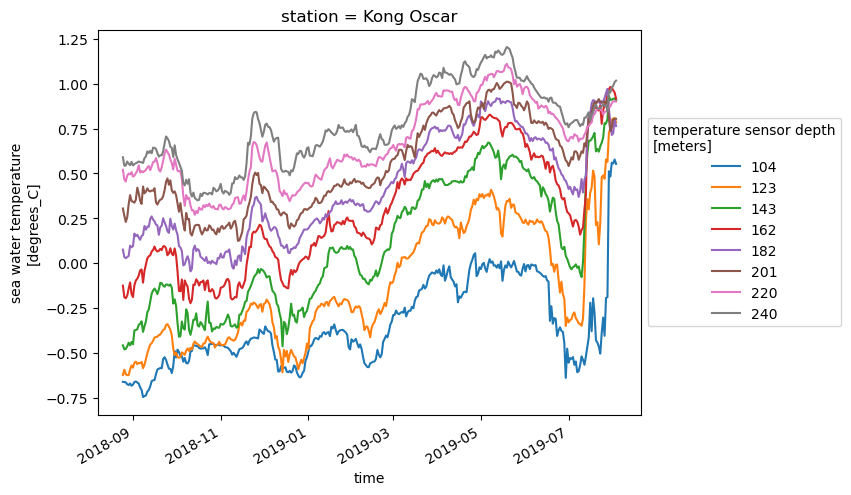

<xarray.Dataset>
Dimensions:                    (station: 1, time: 344, depth_temperature: 8,
                                depth_CTD: 2)
Coordinates:
  * station                    (station) object 'Kong Oscar'
  * time                       (time) datetime64[ns] 2018-08-25 ... 2019-08-03
  * depth_temperature          (depth_temperature) int32 104 123 143 ... 220 240
  * depth_CTD                  (depth_CTD) int32 104 240
    serial_number_temperature  (depth_temperature) object 'SBE37_03716754' .....
    serial_number_CTD          (depth_CTD) object 'SBE37_03716754' 'SBE37_037...
Data variables:
    latitude                   (station) float64 ...
    longitude                  (station) float64 ...
    temperature                (time, depth_temperature) float64 -0.6629 ... ...
    salinity                   (time, depth_CTD) float64 33.38 33.9 ... 34.06
    conductivity               (time, depth_CTD) float64 2.732 2.881 ... 2.931
    potential_temperature      (time, depth_CTD) float64 -0.6656 ... 1.006
    pressure                   (time, depth_CTD) float64 98.55 235.4 ... 260.9
    depth                      (time, depth_CTD) float64 97.51 232.9 ... 258.0
    density                    (time, depth_CTD) float64 1.027e+03 ... 1.029e+03
Attributes: (12/53)
    title:                         OMG Narwhals Kong Oscar 2018-2019 Ocean Mo...
    summary:                       This file contains daily-averaged conducti...
    keywords:                      Conductivity, Salinity, Water Depth, Water...
    keywords_vocabulary:           NASA Global Change Master Directory (GCMD)...
    Conventions:                   CF-1.8, ACDD-1.3
    standard_name_vocabulary:      NetCDF Climate and Forecast (CF) Metadata ...
    ...                            ...
    time_coverage_start:           2018-08-25T00:00:00
    time_coverage_end:             2019-08-03T00:00:00
    time_coverage_duration:        P343DT0H0M0S
    date_created:                  2023-07-04T11:33:22
    instrument:                    SBE37SM-RS232; SBE56
    time_coverage_resolution:      P1D

processing 2018-2019 Sverdrup glacier mooring data
merging Sverdrup datasets


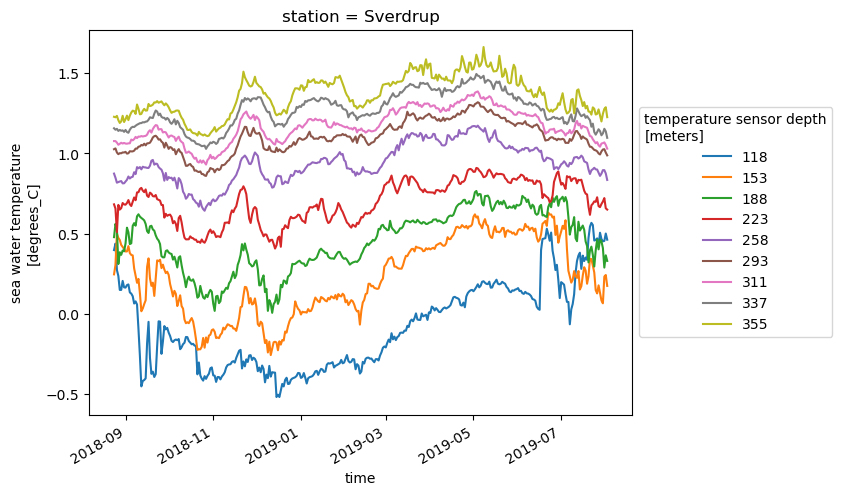

<xarray.Dataset>
Dimensions:                    (station: 1, time: 344, depth_temperature: 9,
                                depth_CTD: 2)
Coordinates:
  * station                    (station) object 'Sverdrup'
  * time                       (time) datetime64[ns] 2018-08-24 ... 2019-08-02
  * depth_temperature          (depth_temperature) int32 118 153 188 ... 337 355
  * depth_CTD                  (depth_CTD) int32 118 355
    serial_number_temperature  (depth_temperature) object 'SBE37_03716787' .....
    serial_number_CTD          (depth_CTD) object 'SBE37_03716787' 'SBE37_037...
Data variables:
    latitude                   (station) float64 ...
    longitude                  (station) float64 ...
    temperature                (time, depth_temperature) float64 0.3978 ... 1...
    salinity                   (time, depth_CTD) float64 33.58 34.17 ... 34.2
    conductivity               (time, depth_CTD) float64 2.835 2.962 ... 2.964
    potential_temperature      (time, depth_CTD) float64 0.3933 1.211 ... 1.208
    pressure                   (time, depth_CTD) float64 119.6 359.3 ... 359.6
    depth                      (time, depth_CTD) float64 118.4 355.3 ... 355.5
    density                    (time, depth_CTD) float64 1.028e+03 ... 1.029e+03
Attributes: (12/53)
    title:                         OMG Narwhals Sverdrup 2018-2019 Ocean Moor...
    summary:                       This file contains daily-averaged conducti...
    keywords:                      Conductivity, Salinity, Water Depth, Water...
    keywords_vocabulary:           NASA Global Change Master Directory (GCMD)...
    Conventions:                   CF-1.8, ACDD-1.3
    standard_name_vocabulary:      NetCDF Climate and Forecast (CF) Metadata ...
    ...                            ...
    time_coverage_start:           2018-08-24T00:00:00
    time_coverage_end:             2019-08-02T00:00:00
    time_coverage_duration:        P343DT0H0M0S
    date_created:                  2023-07-04T11:35:39
    instrument:                    SBE37SM-RS232; SBE56
    time_coverage_resolution:      P1D

processing 2019-2020 Rink/Fisher mooring data
merging Fisher datasets


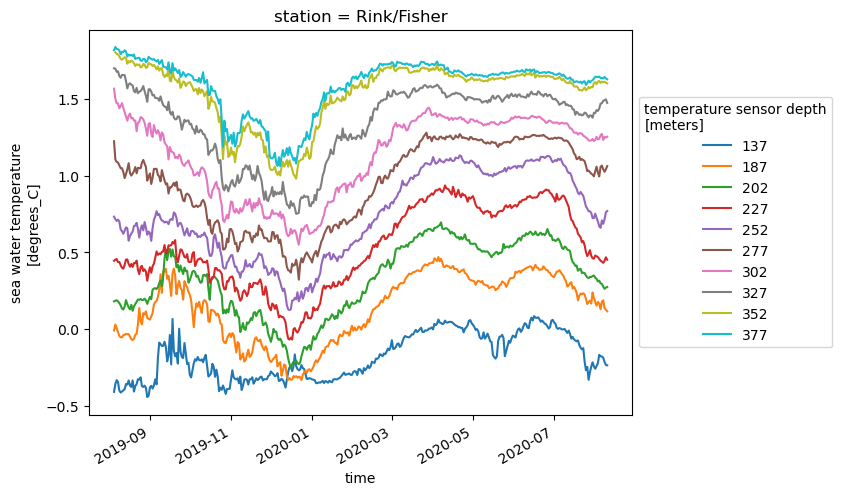

<xarray.Dataset>
Dimensions:                    (station: 1, time: 372, depth_temperature: 10,
                                depth_CTD: 2)
Coordinates:
  * station                    (station) object 'Rink/Fisher'
  * time                       (time) datetime64[ns] 2019-08-05 ... 2020-08-10
  * depth_temperature          (depth_temperature) int32 137 187 202 ... 352 377
  * depth_CTD                  (depth_CTD) int32 137 377
    serial_number_temperature  (depth_temperature) object 'SBE37_03716754' .....
    serial_number_CTD          (depth_CTD) object 'SBE37_03716754' 'SBE37_037...
Data variables:
    latitude                   (station) float64 ...
    longitude                  (station) float64 ...
    temperature                (time, depth_temperature) float64 -0.4107 ... ...
    salinity                   (time, depth_CTD) float64 33.58 34.37 ... 34.34
    conductivity               (time, depth_CTD) float64 2.769 3.029 ... 3.01
    potential_temperature      (time, depth_CTD) float64 -0.415 1.798 ... 1.609
    pressure                   (time, depth_CTD) float64 139.1 380.8 ... 381.0
    depth                      (time, depth_CTD) float64 137.6 376.5 ... 376.7
    density                    (time, depth_CTD) float64 1.028e+03 ... 1.029e+03
Attributes: (12/53)
    title:                         OMG Narwhals Fisher Islands 2019-2020 Ocea...
    summary:                       This file contains daily-averaged conducti...
    keywords:                      Conductivity, Salinity, Water Depth, Water...
    keywords_vocabulary:           NASA Global Change Master Directory (GCMD)...
    Conventions:                   CF-1.8, ACDD-1.3
    standard_name_vocabulary:      NetCDF Climate and Forecast (CF) Metadata ...
    ...                            ...
    time_coverage_start:           2019-08-05T00:00:00
    time_coverage_end:             2020-08-10T00:00:00
    time_coverage_duration:        P371DT0H0M0S
    date_created:                  2023-07-04T11:37:05
    instrument:                    SBE37SM-RS232; SBE56
    time_coverage_resolution:      P1D

processing 2019-2020 Kong Oscar glacier mooring data
merging Kong Oscar datasets


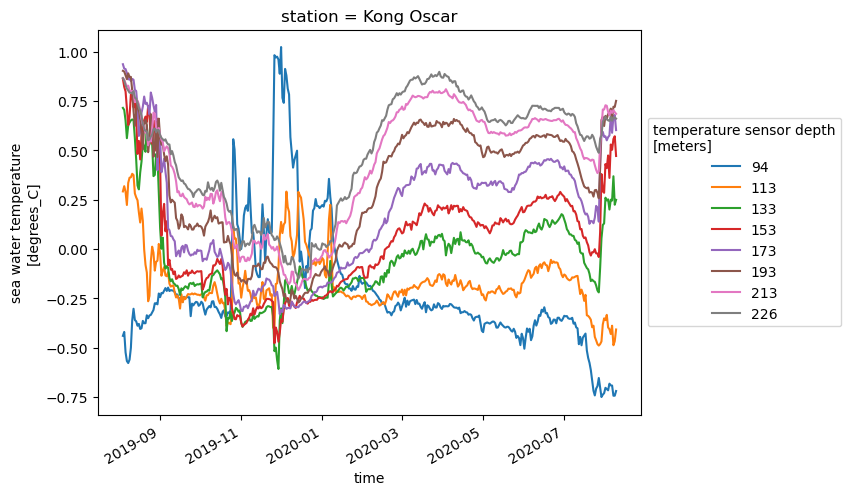

<xarray.Dataset>
Dimensions:                    (station: 1, time: 372, depth_temperature: 8,
                                depth_CTD: 2)
Coordinates:
  * station                    (station) object 'Kong Oscar'
  * time                       (time) datetime64[ns] 2019-08-04 ... 2020-08-09
  * depth_temperature          (depth_temperature) int32 94 113 133 ... 213 226
  * depth_CTD                  (depth_CTD) int32 94 226
    serial_number_temperature  (depth_temperature) object 'SBE37_03716787' .....
    serial_number_CTD          (depth_CTD) object 'SBE37_03716787' 'SBE37_037...
Data variables:
    latitude                   (station) float64 ...
    longitude                  (station) float64 ...
    temperature                (time, depth_temperature) float64 -0.4402 ... ...
    salinity                   (time, depth_CTD) float64 33.38 33.99 ... 33.96
    conductivity               (time, depth_CTD) float64 2.75 2.911 ... 2.891
    potential_temperature      (time, depth_CTD) float64 -0.443 ... 0.6509
    pressure                   (time, depth_CTD) float64 94.49 228.7 ... 228.8
    depth                      (time, depth_CTD) float64 93.49 226.2 ... 226.3
    density                    (time, depth_CTD) float64 1.027e+03 ... 1.028e+03
Attributes: (12/53)
    title:                         OMG Narwhals Kong Oscar 2019-2020 Ocean Mo...
    summary:                       This file contains daily-averaged conducti...
    keywords:                      Conductivity, Salinity, Water Depth, Water...
    keywords_vocabulary:           NASA Global Change Master Directory (GCMD)...
    Conventions:                   CF-1.8, ACDD-1.3
    standard_name_vocabulary:      NetCDF Climate and Forecast (CF) Metadata ...
    ...                            ...
    time_coverage_start:           2019-08-04T00:00:00
    time_coverage_end:             2020-08-09T00:00:00
    time_coverage_duration:        P371DT0H0M0S
    date_created:                  2023-07-04T11:38:04
    instrument:                    SBE37SM-RS232; SBE56
    time_coverage_resolution:      P1D

In [4]:
for year in years:
    ## directory for mooring CTD L2 datasets
    mooring_sbe37_dir = 'F:/PhD_chap3/data/OMG_Narwhals_mooring_data/OMG_Narwhals_mooring_L2/' + str(year)
    
    ## directory for temperature logger L1 datasets
    mooring_sbe56_dir = "F:/PhD_chap3/data/OMG_Narwhals_mooring_data/OMG_Narwhals_mooring_L1/" + str(year) + "/SBE56"
    
    ## get all metadata associated with each data file
    metadata_sbe37 = pd.read_csv("F:/PhD_chap3/metadata/" + str(year) + "/SBE37_metadata_" + str(year) + ".csv") # SBE37
    metadata_sbe56 = pd.read_csv("F:/PhD_chap3/metadata/" + str(year) + "/SBE56_metadata_" + str(year) + ".csv") # SBE56
    
    if year == 2019: 
        for mooring in moorings_2019:
            meta_sbe37 = metadata_sbe37.loc[metadata_sbe37.loc[:,"glacier_front"] == mooring,:]
            meta_sbe56 = metadata_sbe56.loc[metadata_sbe56.loc[:,"glacier_front"] == mooring,:]
            
            ## daily averaging for sbe37 datasets
            filenames_sbe37 = meta_sbe37['filename_L2']
            sbe37_1_ds_1d = omgL3_funs.sbe37_avg(filenames_sbe37.iloc[0], mooring_sbe37_dir, avg_length = '1D')
            sbe37_2_ds_1d = omgL3_funs.sbe37_avg(filenames_sbe37.iloc[1], mooring_sbe37_dir, avg_length = '1D')
            
            ## open dataset to pull attributes
            tmp_ds = xr.open_dataset(Path(mooring_sbe37_dir) / filenames_sbe37.iloc[0])
            
            if mooring == 'Rink glacier': 
                print("processing 2018-2019 Rink/Fisher mooring data")
                truncate = slice("2018-08-26","2019-08-04") # truncate data so that the length of all datasets is equal
                sbe37_1_ds = sbe37_1_ds_1d.sel(time=truncate)
                sbe37_2_ds = sbe37_2_ds_1d.sel(time=truncate)
                
                ## daily averaging for sbe56 datasets
                filenames_sbe56 = meta_sbe56['filename_L1']
                netcdf_sbe37 = 'OMG_Narwhals_Mooring_CTD_L2_03716788_20180826.nc' # used to remove flag_depth observations
                sbe56_1_ds = omgL3_funs.sbe56_avg(filenames_sbe56.iloc[0], mooring_sbe56_dir, netcdf_sbe37, mooring_sbe37_dir, '1D', truncate)
                sbe56_2_ds = omgL3_funs.sbe56_avg(filenames_sbe56.iloc[1], mooring_sbe56_dir, netcdf_sbe37, mooring_sbe37_dir, '1D', truncate)
                sbe56_3_ds = omgL3_funs.sbe56_avg(filenames_sbe56.iloc[2], mooring_sbe56_dir, netcdf_sbe37, mooring_sbe37_dir, '1D', truncate)
                sbe56_4_ds = omgL3_funs.sbe56_avg(filenames_sbe56.iloc[3], mooring_sbe56_dir, netcdf_sbe37, mooring_sbe37_dir, '1D', truncate)
                sbe56_5_ds = omgL3_funs.sbe56_avg(filenames_sbe56.iloc[4], mooring_sbe56_dir, netcdf_sbe37, mooring_sbe37_dir, '1D', truncate)
                sbe56_6_ds = omgL3_funs.sbe56_avg(filenames_sbe56.iloc[5], mooring_sbe56_dir, netcdf_sbe37, mooring_sbe37_dir, '1D', truncate)
                sbe56_7_ds = omgL3_funs.sbe56_avg(filenames_sbe56.iloc[6], mooring_sbe56_dir, netcdf_sbe37, mooring_sbe37_dir, '1D', truncate)
                sbe56_8_ds = omgL3_funs.sbe56_avg(filenames_sbe56.iloc[7], mooring_sbe56_dir, netcdf_sbe37, mooring_sbe37_dir, '1D', truncate)
                
                ## define attributes for this mooring
                uuid = '906a0f5c-14dd-11ec-82a8-0242ac130003'
                netcdf_filename = 'OMG_Narwhals_Mooring_RinkFisher_1D_L3_2018-2019.nc'
                title = 'OMG Narwhals Rink 2018-2019 Ocean Mooring Level 3 Data'
                
            if mooring == 'Kong Oscar glacier': 
                print("processing 2018-2019 Kong Oscar glacier mooring data")
                truncate = slice("2018-08-25","2019-08-03") # truncate data so that the length of all datasets is equal
                sbe37_1_ds = sbe37_1_ds_1d.sel(time=truncate)
                sbe37_2_ds = sbe37_2_ds_1d.sel(time=truncate)
                
                ## daily averaging for sbe56 datasets
                filenames_sbe56 = meta_sbe56['filename_L1']
                netcdf_sbe37 = 'OMG_Narwhals_Mooring_CTD_L2_03716754_20180825.nc'
                sbe56_1_ds = omgL3_funs.sbe56_avg(filenames_sbe56.iloc[0], mooring_sbe56_dir, netcdf_sbe37, mooring_sbe37_dir, '1D', truncate)
                sbe56_2_ds = omgL3_funs.sbe56_avg(filenames_sbe56.iloc[1], mooring_sbe56_dir, netcdf_sbe37, mooring_sbe37_dir, '1D', truncate)
                sbe56_3_ds = omgL3_funs.sbe56_avg(filenames_sbe56.iloc[2], mooring_sbe56_dir, netcdf_sbe37, mooring_sbe37_dir, '1D', truncate)
                sbe56_4_ds = omgL3_funs.sbe56_avg(filenames_sbe56.iloc[3], mooring_sbe56_dir, netcdf_sbe37, mooring_sbe37_dir, '1D', truncate)
                sbe56_5_ds = omgL3_funs.sbe56_avg(filenames_sbe56.iloc[4], mooring_sbe56_dir, netcdf_sbe37, mooring_sbe37_dir, '1D', truncate)
                sbe56_6_ds = omgL3_funs.sbe56_avg(filenames_sbe56.iloc[5], mooring_sbe56_dir, netcdf_sbe37, mooring_sbe37_dir, '1D', truncate)
                
                ## define attributes for this mooring
                uuid = '906a1010-14dd-11ec-82a8-0242ac130003'
                netcdf_filename = 'OMG_Narwhals_Mooring_KongOscar_1D_L3_2018-2019.nc'
                title = 'OMG Narwhals Kong Oscar 2018-2019 Ocean Mooring Level 3 Data'
                
            if mooring == 'Sverdrup glacier': 
                print("processing 2018-2019 Sverdrup glacier mooring data")
                truncate = slice("2018-08-24","2019-08-02") # truncate data so that the length of all datasets is equal
                sbe37_1_ds = sbe37_1_ds_1d.sel(time=truncate)
                sbe37_2_ds = sbe37_2_ds_1d.sel(time=truncate)
                
                ## daily averaging for sbe56 datasets
                filenames_sbe56 = meta_sbe56['filename_L1']
                netcdf_sbe37 = 'OMG_Narwhals_Mooring_CTD_L2_03716787_20180824.nc'
                sbe56_1_ds = omgL3_funs.sbe56_avg(filenames_sbe56.iloc[0], mooring_sbe56_dir, netcdf_sbe37, mooring_sbe37_dir, '1D', truncate)
                sbe56_2_ds = omgL3_funs.sbe56_avg(filenames_sbe56.iloc[1], mooring_sbe56_dir, netcdf_sbe37, mooring_sbe37_dir, '1D', truncate)
                sbe56_3_ds = omgL3_funs.sbe56_avg(filenames_sbe56.iloc[2], mooring_sbe56_dir, netcdf_sbe37, mooring_sbe37_dir, '1D', truncate)
                sbe56_4_ds = omgL3_funs.sbe56_avg(filenames_sbe56.iloc[3], mooring_sbe56_dir, netcdf_sbe37, mooring_sbe37_dir, '1D', truncate)
                sbe56_5_ds = omgL3_funs.sbe56_avg(filenames_sbe56.iloc[4], mooring_sbe56_dir, netcdf_sbe37, mooring_sbe37_dir, '1D', truncate)
                sbe56_6_ds = omgL3_funs.sbe56_avg(filenames_sbe56.iloc[5], mooring_sbe56_dir, netcdf_sbe37, mooring_sbe37_dir, '1D', truncate)
                sbe56_7_ds = omgL3_funs.sbe56_avg(filenames_sbe56.iloc[6], mooring_sbe56_dir, netcdf_sbe37, mooring_sbe37_dir, '1D', truncate)
                
                ## define attributes for this mooring
                uuid = '906a11dc-14dd-11ec-82a8-0242ac130003'
                netcdf_filename = 'OMG_Narwhals_Mooring_Sverdrup_1D_L3_2018-2019.nc'
                title = 'OMG Narwhals Sverdrup 2018-2019 Ocean Mooring Level 3 Data'
                
            ## add depth to sbe37 variables
            sbe37_1_T, sbe37_1_C, sbe37_1_D, sbe37_1_PT, sbe37_1_P, sbe37_1_DP, sbe37_1_S = omgL3_funs.sbe37_add_dims(sbe37_1_ds)
            sbe37_2_T, sbe37_2_C, sbe37_2_D, sbe37_2_PT, sbe37_2_P, sbe37_2_DP, sbe37_2_S = omgL3_funs.sbe37_add_dims(sbe37_2_ds)
            
            ## add depth to sbe56 variables and then merge datasets
            if mooring == "Rink glacier":
                # add depth
                sbe56_1_T = omgL3_funs.sbe56_add_dims(sbe56_1_ds)
                sbe56_2_T = omgL3_funs.sbe56_add_dims(sbe56_2_ds)
                sbe56_3_T = omgL3_funs.sbe56_add_dims(sbe56_3_ds)
                sbe56_4_T = omgL3_funs.sbe56_add_dims(sbe56_4_ds)
                sbe56_5_T = omgL3_funs.sbe56_add_dims(sbe56_5_ds)
                sbe56_6_T = omgL3_funs.sbe56_add_dims(sbe56_6_ds)
                sbe56_7_T = omgL3_funs.sbe56_add_dims(sbe56_7_ds)
                sbe56_8_T = omgL3_funs.sbe56_add_dims(sbe56_8_ds)
                
                ## merge datasets
                print('merging Rink datasets')
                sbe_merged = xr.merge([sbe37_1_C, sbe37_1_D, sbe37_1_PT, sbe37_1_P, sbe37_1_DP, sbe37_1_S, sbe37_1_T,\
                                       sbe37_2_C, sbe37_2_D, sbe37_2_PT, sbe37_2_P, sbe37_2_DP, sbe37_2_S, sbe37_2_T,\
                                       sbe56_1_T, sbe56_2_T, sbe56_3_T, sbe56_4_T, sbe56_5_T, sbe56_6_T, sbe56_7_T, sbe56_8_T]) 
                
            if mooring == 'Kong Oscar glacier':
                # add depth
                sbe56_1_T = omgL3_funs.sbe56_add_dims(sbe56_1_ds)
                sbe56_2_T = omgL3_funs.sbe56_add_dims(sbe56_2_ds)
                sbe56_3_T = omgL3_funs.sbe56_add_dims(sbe56_3_ds)
                sbe56_4_T = omgL3_funs.sbe56_add_dims(sbe56_4_ds)
                sbe56_5_T = omgL3_funs.sbe56_add_dims(sbe56_5_ds)
                sbe56_6_T = omgL3_funs.sbe56_add_dims(sbe56_6_ds)
                
                ## merge datasets
                print('merging Kong Oscar datasets')
                sbe_merged = xr.merge([sbe37_1_C, sbe37_1_D, sbe37_1_PT, sbe37_1_P, sbe37_1_DP, sbe37_1_S, sbe37_1_T, \
                                       sbe37_2_C, sbe37_2_D, sbe37_2_PT, sbe37_2_P, sbe37_2_DP, sbe37_2_S, sbe37_2_T, \
                                       sbe56_1_T, sbe56_2_T, sbe56_3_T, sbe56_4_T, sbe56_5_T, sbe56_6_T]) 
                
            if mooring == 'Sverdrup glacier':
                # add depth
                sbe56_1_T = omgL3_funs.sbe56_add_dims(sbe56_1_ds)
                sbe56_2_T = omgL3_funs.sbe56_add_dims(sbe56_2_ds)
                sbe56_3_T = omgL3_funs.sbe56_add_dims(sbe56_3_ds)
                sbe56_4_T = omgL3_funs.sbe56_add_dims(sbe56_4_ds)
                sbe56_5_T = omgL3_funs.sbe56_add_dims(sbe56_5_ds)
                sbe56_6_T = omgL3_funs.sbe56_add_dims(sbe56_6_ds)
                sbe56_7_T = omgL3_funs.sbe56_add_dims(sbe56_7_ds)
                
                ## merge datasets
                print('merging Sverdrup datasets')
                sbe_merged = xr.merge([sbe37_1_C, sbe37_1_D, sbe37_1_PT, sbe37_1_P, sbe37_1_DP, sbe37_1_S, sbe37_1_T, \
                                       sbe37_2_C, sbe37_2_D, sbe37_2_PT, sbe37_2_P, sbe37_2_DP, sbe37_2_S, sbe37_2_T,
                                       sbe56_1_T, sbe56_2_T, sbe56_3_T, sbe56_4_T, sbe56_5_T, sbe56_6_T, sbe56_7_T]) 
            
            ## update global attributes
            sbe_merged_final = omgL3_funs.add_metadata(sbe_merged, tmp_ds, title, netcdf_filename, uuid)
            
            ## look at temp plot
            sbe_merged_final.isel(station=0).temperature.plot.line(x="time", figsize = (7,5));
            sns.move_legend(plt.gca(), loc='center left', bbox_to_anchor=(1, 0.5))
            plt.show()
            
            ## double check new xarray dataset is organized properly
            with xr.set_options(display_style="html"):
                display(sbe_merged_final)
                
            ## save final, merged netcdf
            # Create NetCDF variable encoding (required to save the time values properly)
            new_encoding = omgL3_funs.create_encoding(sbe_merged_final)
            output_dir = Path('F:/PhD_chap3/data/OMG_Narwhals_mooring_data/OMG_Narwhals_mooring_L3/2019')
            sbe_merged_final.to_netcdf(output_dir / netcdf_filename, encoding=new_encoding)
            
    if year == 2020:
        for mooring in moorings_2020:
            meta_sbe37 = metadata_sbe37.loc[metadata_sbe37.loc[:,"glacier_front"] == mooring,:]
            meta_sbe56 = metadata_sbe56.loc[metadata_sbe56.loc[:,"glacier_front"] == mooring,:]
            
            ## daily averaging for sbe37 datasets
            filenames_sbe37 = meta_sbe37['filename_L2']
            sbe37_1_ds_1d = omgL3_funs.sbe37_avg(filenames_sbe37.iloc[0], mooring_sbe37_dir, avg_length = '1D')
            sbe37_2_ds_1d = omgL3_funs.sbe37_avg(filenames_sbe37.iloc[1], mooring_sbe37_dir, avg_length = '1D')
            
            ## open dataset to pull attributes
            tmp_ds = xr.open_dataset(Path(mooring_sbe37_dir) / filenames_sbe37.iloc[0])
            
            if mooring == "Kong Oscar glacier": 
                print("processing 2019-2020 Kong Oscar glacier mooring data")
                truncate = slice("2019-08-04","2020-08-09") # truncate data so that the length of all datasets is equal
                sbe37_1_ds = sbe37_1_ds_1d.sel(time=truncate)
                sbe37_2_ds = sbe37_2_ds_1d.sel(time=truncate)

                ## daily averaging for sbe56 datasets
                filenames_sbe56 = meta_sbe56['filename_L1']
                netcdf_sbe37 = 'OMG_Narwhals_Mooring_CTD_L2_03716787_20190804.nc'
                sbe56_1_ds = omgL3_funs.sbe56_avg(filenames_sbe56.iloc[0], mooring_sbe56_dir, netcdf_sbe37, mooring_sbe37_dir, '1D', truncate)
                sbe56_2_ds = omgL3_funs.sbe56_avg(filenames_sbe56.iloc[1], mooring_sbe56_dir, netcdf_sbe37, mooring_sbe37_dir, '1D', truncate)
                sbe56_3_ds = omgL3_funs.sbe56_avg(filenames_sbe56.iloc[2], mooring_sbe56_dir, netcdf_sbe37, mooring_sbe37_dir, '1D', truncate)
                sbe56_4_ds = omgL3_funs.sbe56_avg(filenames_sbe56.iloc[3], mooring_sbe56_dir, netcdf_sbe37, mooring_sbe37_dir, '1D', truncate)
                sbe56_5_ds = omgL3_funs.sbe56_avg(filenames_sbe56.iloc[4], mooring_sbe56_dir, netcdf_sbe37, mooring_sbe37_dir, '1D', truncate)
                sbe56_6_ds = omgL3_funs.sbe56_avg(filenames_sbe56.iloc[5], mooring_sbe56_dir, netcdf_sbe37, mooring_sbe37_dir, '1D', truncate)
                
                ## define attributes for this mooring
                uuid = '37f9a56a-726d-11ec-90d6-0242ac120003'
                netcdf_filename = 'OMG_Narwhals_Mooring_KongOscar_1D_L3_2019-2020.nc'
                title = 'OMG Narwhals Kong Oscar 2019-2020 Ocean Mooring Level 3 Data'
                
            if mooring == "Rink glacier": 
                print("processing 2019-2020 Rink/Fisher mooring data")
                truncate = slice("2019-08-05","2020-08-10") # truncate data so that the length of all datasets is equal
                sbe37_1_ds = sbe37_1_ds_1d.sel(time=truncate)
                sbe37_2_ds = sbe37_2_ds_1d.sel(time=truncate)
                
                ## daily averaging for sbe56 datasets
                filenames_sbe56 = meta_sbe56['filename_L1']
                netcdf_sbe37 = 'OMG_Narwhals_Mooring_CTD_L2_03716754_20190805.nc'
                sbe56_1_ds = omgL3_funs.sbe56_avg(filenames_sbe56.iloc[0], mooring_sbe56_dir, netcdf_sbe37, mooring_sbe37_dir, '1D', truncate)
                sbe56_2_ds = omgL3_funs.sbe56_avg(filenames_sbe56.iloc[1], mooring_sbe56_dir, netcdf_sbe37, mooring_sbe37_dir, '1D', truncate)
                sbe56_3_ds = omgL3_funs.sbe56_avg(filenames_sbe56.iloc[2], mooring_sbe56_dir, netcdf_sbe37, mooring_sbe37_dir, '1D', truncate)
                sbe56_4_ds = omgL3_funs.sbe56_avg(filenames_sbe56.iloc[3], mooring_sbe56_dir, netcdf_sbe37, mooring_sbe37_dir, '1D', truncate)
                sbe56_5_ds = omgL3_funs.sbe56_avg(filenames_sbe56.iloc[4], mooring_sbe56_dir, netcdf_sbe37, mooring_sbe37_dir, '1D', truncate)
                sbe56_6_ds = omgL3_funs.sbe56_avg(filenames_sbe56.iloc[5], mooring_sbe56_dir, netcdf_sbe37, mooring_sbe37_dir, '1D', truncate)
                sbe56_7_ds = omgL3_funs.sbe56_avg(filenames_sbe56.iloc[6], mooring_sbe56_dir, netcdf_sbe37, mooring_sbe37_dir, '1D', truncate)
                sbe56_8_ds = omgL3_funs.sbe56_avg(filenames_sbe56.iloc[7], mooring_sbe56_dir, netcdf_sbe37, mooring_sbe37_dir, '1D', truncate)
                
                ## define attributes for this mooring
                uuid = '37f9a45c-726d-11ec-90d6-0242ac120003'
                netcdf_filename = 'OMG_Narwhals_Mooring_RinkFisher_1D_L3_2019-2020.nc'
                title = 'OMG Narwhals Fisher Islands 2019-2020 Ocean Mooring Level 3 Data'
        
            ## add depth to sbe37 variables
            sbe37_1_T, sbe37_1_C, sbe37_1_D, sbe37_1_PT, sbe37_1_P, sbe37_1_DP, sbe37_1_S = omgL3_funs.sbe37_add_dims(sbe37_1_ds)
            sbe37_2_T, sbe37_2_C, sbe37_2_D, sbe37_2_PT, sbe37_2_P, sbe37_2_DP, sbe37_2_S = omgL3_funs.sbe37_add_dims(sbe37_2_ds)
            
            ## add depth to sbe56 variables and then merge datasets
            if mooring == "Rink glacier":
                # add depth
                sbe56_1_T = omgL3_funs.sbe56_add_dims(sbe56_1_ds)
                sbe56_2_T = omgL3_funs.sbe56_add_dims(sbe56_2_ds)
                sbe56_3_T = omgL3_funs.sbe56_add_dims(sbe56_3_ds)
                sbe56_4_T = omgL3_funs.sbe56_add_dims(sbe56_4_ds)
                sbe56_5_T = omgL3_funs.sbe56_add_dims(sbe56_5_ds)
                sbe56_6_T = omgL3_funs.sbe56_add_dims(sbe56_6_ds)
                sbe56_7_T = omgL3_funs.sbe56_add_dims(sbe56_7_ds)
                sbe56_8_T = omgL3_funs.sbe56_add_dims(sbe56_8_ds)
                
                ## merge datasets
                print('merging Fisher datasets')
                sbe_merged = xr.merge([sbe37_1_C, sbe37_1_D, sbe37_1_PT, sbe37_1_P, sbe37_1_DP, sbe37_1_S, sbe37_1_T,\
                                       sbe37_2_C, sbe37_2_D, sbe37_2_PT, sbe37_2_P, sbe37_2_DP, sbe37_2_S, sbe37_2_T,\
                                       sbe56_1_T, sbe56_2_T, sbe56_3_T, sbe56_4_T, sbe56_5_T, sbe56_6_T, sbe56_7_T, sbe56_8_T]) 
                
            if mooring == 'Kong Oscar glacier':
                # add depth
                sbe56_1_T = omgL3_funs.sbe56_add_dims(sbe56_1_ds)
                sbe56_2_T = omgL3_funs.sbe56_add_dims(sbe56_2_ds)
                sbe56_3_T = omgL3_funs.sbe56_add_dims(sbe56_3_ds)
                sbe56_4_T = omgL3_funs.sbe56_add_dims(sbe56_4_ds)
                sbe56_5_T = omgL3_funs.sbe56_add_dims(sbe56_5_ds)
                sbe56_6_T = omgL3_funs.sbe56_add_dims(sbe56_6_ds)
                
                ## merge datasets
                print('merging Kong Oscar datasets')
                sbe_merged = xr.merge([sbe37_1_C, sbe37_1_D, sbe37_1_PT, sbe37_1_P, sbe37_1_DP, sbe37_1_S, sbe37_1_T, \
                                       sbe37_2_C, sbe37_2_D, sbe37_2_PT, sbe37_2_P, sbe37_2_DP, sbe37_2_S, sbe37_2_T, \
                                       sbe56_1_T, sbe56_2_T, sbe56_3_T, sbe56_4_T, sbe56_5_T, sbe56_6_T]) 
           
            ## update global attributes
            sbe_merged_final = omgL3_funs.add_metadata(sbe_merged, tmp_ds, title, netcdf_filename, uuid)
            
            ## look at temp plot
            sbe_merged_final.isel(station=0).temperature.plot.line(x="time", figsize = (7,5))
            sns.move_legend(plt.gca(), loc='center left', bbox_to_anchor=(1, 0.5))
            plt.show()
            
            ## double check new xarray dataset is organized properly
            with xr.set_options(display_style="html"):
                display(sbe_merged_final)
                
            ## save final, merged netcdf
            # Create NetCDF variable encoding (required to save the time values properly)
            new_encoding = omgL3_funs.create_encoding(sbe_merged_final)
            output_dir = Path('F:/PhD_chap3/data/OMG_Narwhals_mooring_data/OMG_Narwhals_mooring_L3/2020') # 2020
            sbe_merged_final.to_netcdf(output_dir / netcdf_filename, encoding=new_encoding)

## Check a file

In [7]:
tmp = xr.open_dataset('F:/PhD_chap3/data/OMG_Narwhals_mooring_data/OMG_Narwhals_mooring_L3/2019/OMG_Narwhals_Mooring_RinkFisher_1D_L3_2018-2019.nc')
tmp.close()

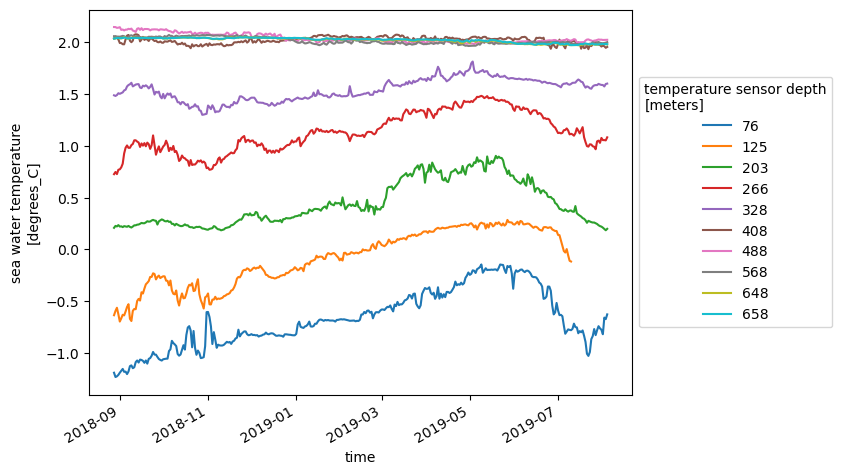

In [8]:
tmp.temperature.plot.line(x="time", figsize = (7,5));
sns.move_legend(plt.gca(), loc='center left', bbox_to_anchor=(1, 0.5))